# Introduction
- In today's thriving e-commerce landscape, understanding and enhancing the customer experience are essential for business success; an international e-commerce company specializing in electronic products is embarking on a data-driven journey to revolutionize its operations, leveraging advanced machine learning techniques to dissect customer interactions and product shipments, aiming to boost satisfaction and efficiency with a foundation of a robust dataset of 10,999 observations across 12 variables providing insights into the entire customer journey from purchase to delivery. 
This project aims to equip the enterprise with insights to surpass customer expectations and improve operational efficiency through data-driven strategies. E-commerce research emphasizes the importance of data-driven approaches in customer segmentation, recommendation systems, and supply chain management. Existing literature and works on similar datasets  highlight the transformative potential of machine learning in extracting insights from e-commerce datasets. The importance of delivering the goods on time by customer reviews and trying to predict ways to deliver data in faster ways. The goals of the project include identifying patterns in the customer journey, segmenting customers for targeted strategies, optimizing supply chain operations, and enhancing overall customer satisfaction. This project seeks to empower the enterprise with analytical tools for navigating the e-commerce landscape and fostering customer-centric growth.
  ## Metadata
  
- ID: A unique identifier for each customer, ensuring precise tracking and personalized insights. 
- Warehouse Block: With the company's expansive warehouse segmented into blocks A through E, this variable helps in logistics optimization and inventory management. 
- Mode of Shipment: Understanding the impact of different shipment methods (Ship, Flight, Road) on customer satisfaction and delivery efficiency.
- Customer Care Calls: The frequency of customer inquiries serves as an indicator of service quality and customer engagement. 
- Customer Rating: A direct measure of customer satisfaction, with ratings ranging from 1 (lowest) to 5 (highest). 
- Cost of the Product: This financial metric is crucial for pricing strategies and profitability analysis. 
- Prior Purchases: Tracking customers' purchase history aids in predicting future buying behavior and personalizing marketing efforts. 
- Product Importance: Categorizing products based on their importance (low, medium, high) enables tailored handling and prioritization. 
- Gender: Analyzing shopping patterns and preferences across genders. 
- Discount Offered: Examining the impact of discounts on sales volume and customer acquisition. 
- Weight in Grams: The logistical aspect of shipping, influencing costs and delivery methods. 
- Reached on Time: The critical outcome variable indicating whether a product was delivered within the expected timeframe, serving as a benchmark for operational efficiency. 0 indicates it reached on time and 1 indicates that its not reached on time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Train new.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data=data.drop(columns=['ID'])

In [5]:
data=data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'})

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [8]:
categorical_data=data.select_dtypes(include=["object"])
numerical_data=data.select_dtypes(include=["int","float"])

Text(0.5, 1.0, 'Reached on time')

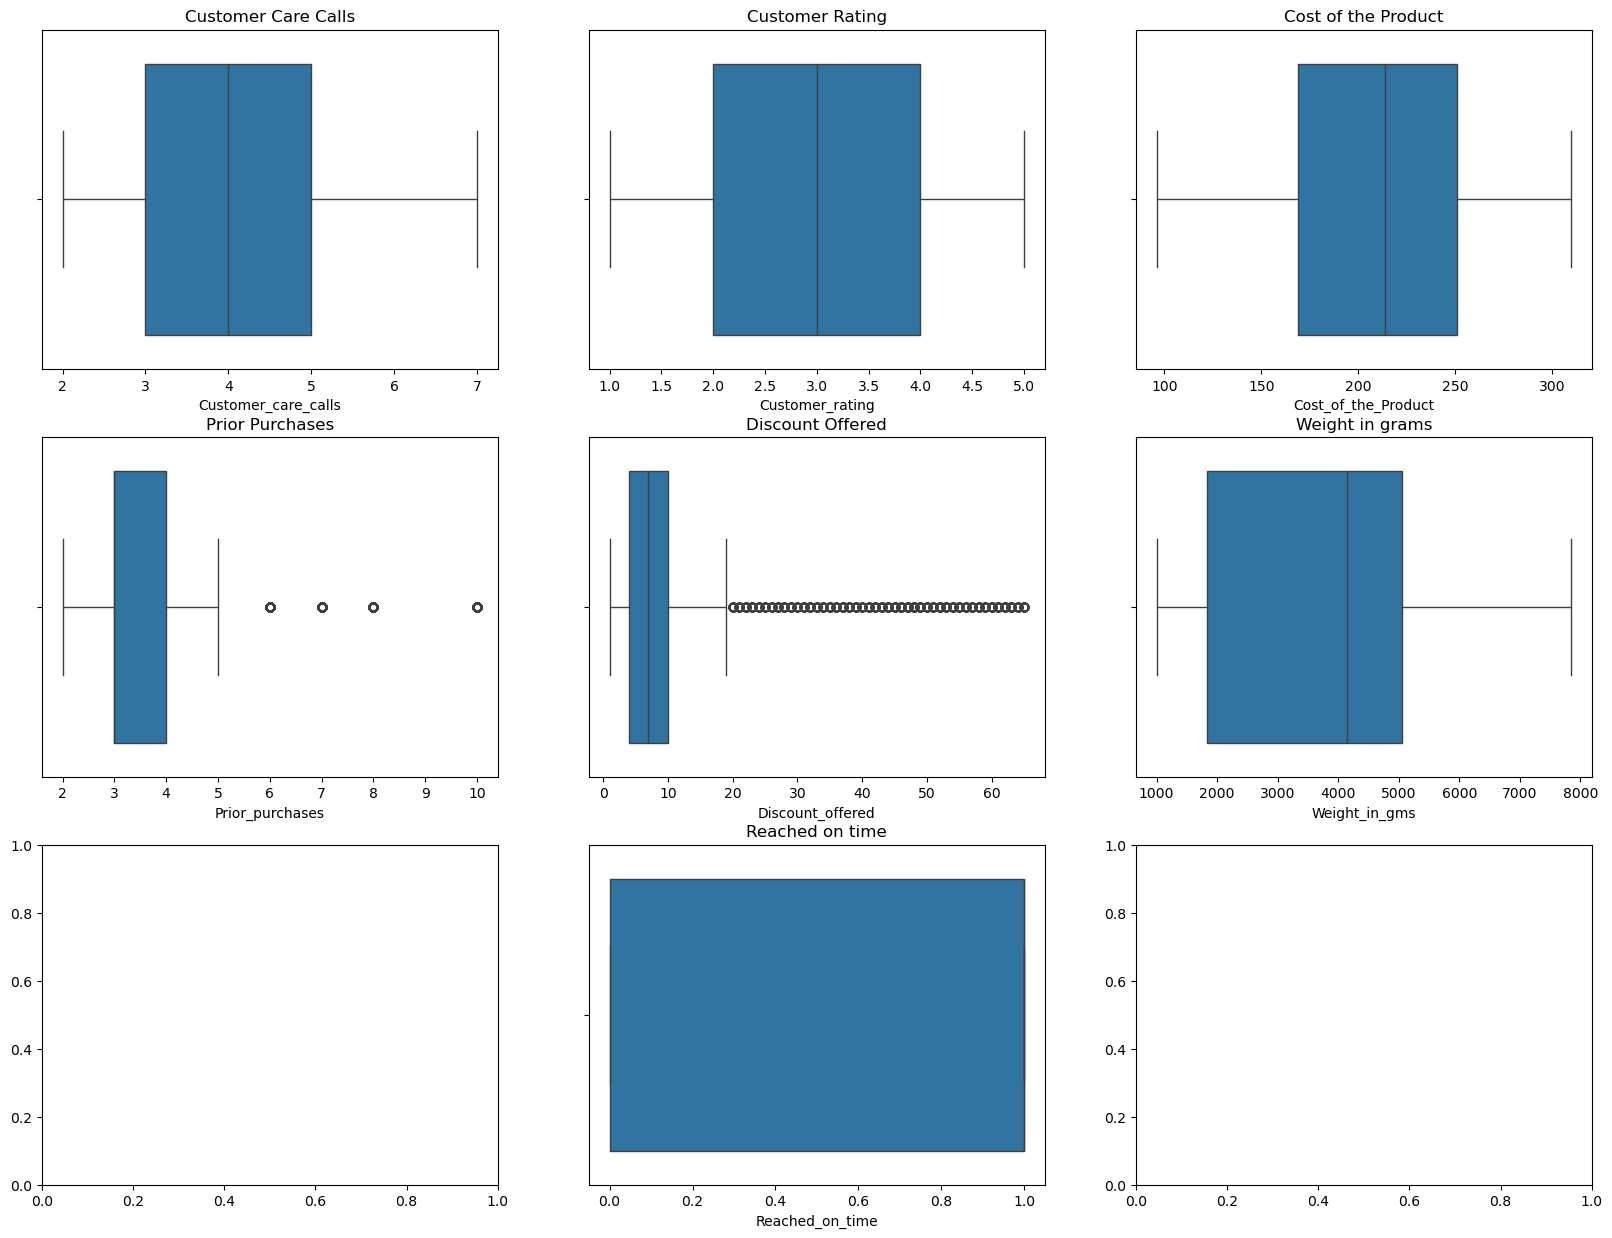

In [16]:
fig, axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(data=data,x='Customer_care_calls',ax=axes[0][0])
sns.boxplot(data=data,x='Customer_rating',ax=axes[0][1])
sns.boxplot(data=data,x='Cost_of_the_Product',ax=axes[0][2])
sns.boxplot(data=data,x='Prior_purchases',ax=axes[1][0])
sns.boxplot(data=data,x='Discount_offered',ax=axes[1][1])
sns.boxplot(data=data,x='Weight_in_gms',ax=axes[1][2])
sns.boxplot(data=data,x='Reached_on_time',ax=axes[2][1])

axes[0][0].set_title('Customer Care Calls')
axes[0][1].set_title('Customer Rating')
axes[0][2].set_title('Cost of the Product')
axes[1][0].set_title('Prior Purchases')
axes[1][1].set_title('Discount Offered')
axes[1][2].set_title('Weight in grams')
axes[2][1].set_title('Reached on time')

Text(0.5, 1.0, 'Product Importance Distribution')

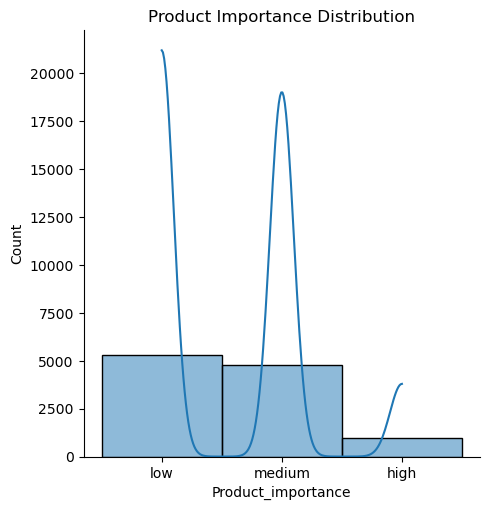

In [17]:
sns.displot(data=data,x='Product_importance',kind='hist',kde=True)
plt.title('Product Importance Distribution')

Text(0.5, 1.0, 'Gender')

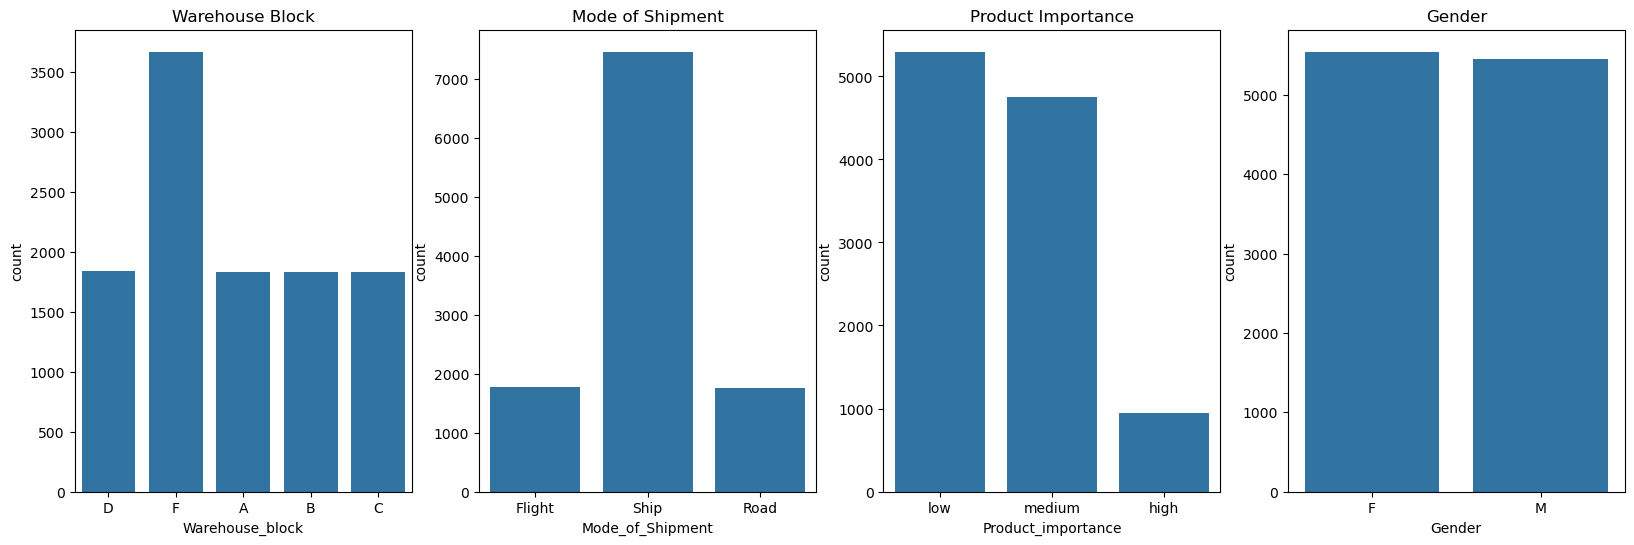

In [18]:
fig, axes =plt.subplots(1,4,figsize=(20,6))
sns.countplot(data=data,x='Warehouse_block',ax=axes[0])
sns.countplot(data=data,x='Mode_of_Shipment',ax=axes[1])
sns.countplot(data=data,x='Product_importance',ax=axes[2])
sns.countplot(data=data,x='Gender',ax=axes[3])

axes[0].set_title('Warehouse Block')
axes[1].set_title('Mode of Shipment')
axes[2].set_title('Product Importance')
axes[3].set_title('Gender')

In [19]:
categorical_data.mode()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,F,Ship,low,F


Text(0.5, 1.0, 'Discount Scatterplot')

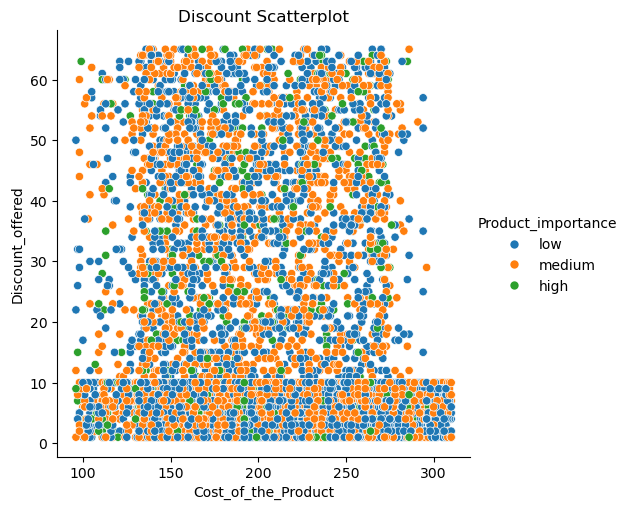

In [20]:
sns.relplot(data=data,x='Cost_of_the_Product',y='Discount_offered',hue='Product_importance',kind="scatter")
plt.title('Discount Scatterplot')

Text(0.5, 1.0, 'Customer Rating Scatterplot')

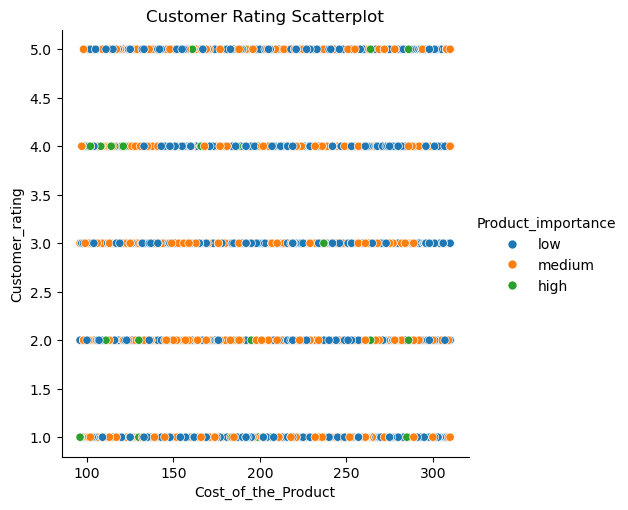

In [21]:
sns.relplot(data=data,x='Cost_of_the_Product',y='Customer_rating',hue='Product_importance',kind="scatter")
plt.title('Customer Rating Scatterplot')

Text(0.5, 1.0, 'Correlation Matrix of Dataset')

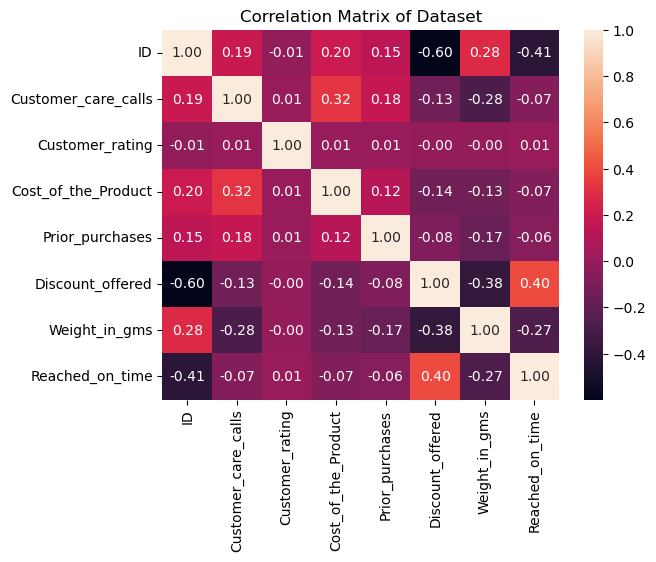

In [22]:
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Dataset')

# One Hot Encoding

In [23]:
data=pd.concat([data,pd.get_dummies(data['Gender'],dtype=int)],axis=1)
data=data.drop(columns=['Gender'])
data


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,F,M
0,1,D,Flight,4,2,177,3,low,44,1233,1,1,0
1,2,F,Flight,4,5,216,2,low,59,3088,1,0,1
2,3,A,Flight,2,2,183,4,low,48,3374,1,0,1
3,4,B,Flight,3,3,176,4,medium,10,1177,1,0,1
4,5,C,Flight,2,2,184,3,medium,46,2484,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,1,1538,1,1,0
10995,10996,B,Ship,4,1,232,5,medium,6,1247,0,1,0
10996,10997,C,Ship,5,4,242,5,low,4,1155,0,1,0
10997,10998,F,Ship,5,2,223,6,medium,2,1210,0,0,1


# Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

data['Cost_of_the_Product_normalized'] = min_max_scaler.fit_transform(data[['Cost_of_the_Product']])
data['Weight_in_gms_normalized'] = min_max_scaler.fit_transform(data[['Weight_in_gms']])

# Standardization

In [26]:
data['Cost_of_the_Product_standardized'] = standard_scaler.fit_transform(data[['Cost_of_the_Product']])
data['Weight_in_gms_standardized'] = standard_scaler.fit_transform(data[['Weight_in_gms']])

In [27]:
data[['Cost_of_the_Product', 'Cost_of_the_Product_normalized', 'Cost_of_the_Product_standardized',
      'Weight_in_gms', 'Weight_in_gms_normalized', 'Weight_in_gms_standardized']].head()

,Cost_of_the_Product,Cost_of_the_Product_normalized,Cost_of_the_Product_standardized,Weight_in_gms,Weight_in_gms_normalized,Weight_in_gms_standardized
0,177,0.378505,-0.690722,1233,0.033893,-1.468240
1,216,0.560748,0.120746,3088,0.304894,-0.333893
2,183,0.406542,-0.565881,3374,0.346676,-0.159002
3,176,0.373832,-0.711529,1177,0.025712,-1.502484
4,184,0.411215,-0.545074,2484,0.216654,-0.703244


In [31]:
def outlierDetector(Column):
    Q1 = data[Column].quantile(0.25)
    Q3 = data[Column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[Column] < lower_bound) | (data[Column] > upper_bound)]
    return outliers


In [32]:
outlierDetector('Discount_offered')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,F,M,Cost_of_the_Product_normalized,Weight_in_gms_normalized,Cost_of_the_Product_standardized,Weight_in_gms_standardized
0,1,D,Flight,4,2,177,3,low,44,1233,1,1,0,0.378505,0.033893,-0.690722,-1.468240
1,2,F,Flight,4,5,216,2,low,59,3088,1,0,1,0.560748,0.304894,0.120746,-0.333893
2,3,A,Flight,2,2,183,4,low,48,3374,1,0,1,0.406542,0.346676,-0.565881,-0.159002
4,5,C,Flight,2,2,184,3,medium,46,2484,1,1,0,0.411215,0.216654,-0.545074,-0.703244
7,8,F,Flight,4,1,233,2,low,48,2804,1,1,0,0.640187,0.263404,0.474462,-0.507561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,3129,A,Road,3,1,169,3,high,24,1740,1,0,1,0.341121,0.107962,-0.857177,-1.158205
3130,3131,C,Road,6,5,246,4,medium,50,3618,1,0,1,0.700935,0.382323,0.744951,-0.009794
3131,3132,F,Road,4,1,232,3,medium,55,2686,1,0,1,0.635514,0.246165,0.453655,-0.579719
3132,3133,D,Road,3,5,251,3,low,21,2476,1,1,0,0.724299,0.215486,0.848985,-0.708136


In [33]:
outlierDetector('Prior_purchases')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_time,F,M,Cost_of_the_Product_normalized,Weight_in_gms_normalized,Cost_of_the_Product_standardized,Weight_in_gms_standardized
37,38,F,Ship,2,4,181,6,medium,16,3605,1,1,0,0.397196,0.380424,-0.607494,-0.017744
62,63,A,Ship,5,1,105,6,medium,62,1292,1,0,1,0.042056,0.042513,-2.188815,-1.432161
74,75,A,Ship,6,1,238,6,low,13,2442,1,1,0,0.663551,0.210519,0.578496,-0.728927
90,91,D,Ship,5,3,174,6,high,41,1085,1,1,0,0.364486,0.012272,-0.753142,-1.558743
133,134,F,Flight,5,4,280,6,medium,51,3582,1,1,0,0.859813,0.377064,1.452384,-0.031809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,10982,F,Ship,5,2,251,6,low,10,1196,0,0,1,0.724299,0.028488,0.848985,-1.490866
10983,10984,B,Ship,4,3,229,6,medium,1,1235,1,0,1,0.621495,0.034186,0.391235,-1.467017
10990,10991,C,Ship,5,4,219,6,low,3,1098,0,0,1,0.574766,0.014171,0.183166,-1.550793
10993,10994,F,Ship,5,1,257,6,low,1,1150,0,1,0,0.752336,0.021768,0.973827,-1.518995
